<a href="https://colab.research.google.com/github/juliablaz2003/PFG/blob/main/PFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga y exploración de datos

Bibliotecas

In [115]:
pip install plotly

Librerias

In [116]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score, silhouette_samples

In [117]:
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/juliablaz2003/PFG/refs/heads/main/breast-cancer.csv"
nombre = 'breast-cancer.csv'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


Cargamos el archivo de cáncer de mama CSV en un DataFrame de pandas que llamamos `df`

In [118]:
df = pd.read_csv(nombre)

A partir de este punto vamos a hacer una exploración de los datos.

In [119]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dimensiones y tipos de datos:

- El dataset contiene 569 filas y 32 columnas.
- La columna `diagnosis` es de tipo objeto (categórica) y las demás variables son numéricas (float64 o int64).

Variables:

- **diagnosis**: Diagnóstico del tumor (Benigno = 0, Maligno = 1).
- **radius_mean**: Radio promedio del núcleo celular (medido en mm).
- **texture_mean**: Variación en la textura de la célula (sin unidad específica).
- **perimeter_mean**: Perímetro promedio del núcleo celular (medido en mm).
- **area_mean**: Área promedio del núcleo celular (medido en mm²).
- **smoothness_mean**: Suavidad de los bordes (sin unidad específica).
- **compactness_mean**: Compacidad de la célula (relación perímetro/área).
- **concavity_mean**: Grado de concavidad de los contornos (sin unidad específica).
- **concave points_mean**: Número de puntos cóncavos en el contorno (sin unidad específica).
- **symmetry_mean**: Simetría del núcleo celular (sin unidad específica).
- **fractal_dimension_mean**: Dimensión fractal del contorno (sin unidad específica).
- **radius_se**: Error estándar del radio (medido en mm).
- **texture_se**: Error estándar de la textura (sin unidad específica).
- **perimeter_se**: Error estándar del perímetro (medido en mm).
- **area_se**: Error estándar del área (medido en mm²).
- **smoothness_se**: Error estándar de la suavidad (sin unidad específica).
- **compactness_se**: Error estándar de la compacidad (sin unidad específica).
- **concavity_se**: Error estándar de la concavidad (sin unidad específica).
- **concave points_se**: Error estándar del número de puntos cóncavos (sin unidad específica).
- **symmetry_se**: Error estándar de la simetría (sin unidad específica).
- **fractal_dimension_se**: Error estándar de la dimensión fractal (sin unidad específica).
- **radius_worst**: Radio del peor caso observado (medido en mm).
- **texture_worst**: Textura del peor caso observado (sin unidad específica).
- **perimeter_worst**: Perímetro del peor caso observado (medido en mm).
- **area_worst**: Área del peor caso observado (medido en mm²).
- **smoothness_worst**: Suavidad del peor caso observado (sin unidad específica).
- **compactness_worst**: Compacidad del peor caso observado (sin unidad específica).
- **concavity_worst**: Concavidad del peor caso observado (sin unidad específica).
- **concave points_worst**: Número de puntos cóncavos en el peor caso observado (sin unidad específica).
- **symmetry_worst**: Simetría del peor caso observado (sin unidad específica).
- **fractal_dimension_worst**: Dimensión fractal del peor caso observado (sin unidad específica).


Se calculan diez características de valor real para cada núcleo de célula:

- Radio (media de las distancias desde el centro hasta los puntos del perímetro)
- Textura (desviación estándar de los valores de la escala de grises)
- Perímetro
- Área
- Suavidad (variación local en las longitudes de los radios)
- Compacidad (perímetro^2 / área - 1.0)
- concavidad (severidad de las partes cóncavas del contorno)
- Puntos cóncavos (número de partes cóncavas del contorno)
- Simetría
- Dimensión fractal ("aproximación de la línea de costa" - 1)

In [120]:
desc = df.describe()
desc

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Resumen de Estadísticas:

- Media del radio del tumor: 14.13 (mínimo 6.98, máximo 28.11).
- Media del área del tumor: 654.89 (mínimo 143.50, máximo 2501.00).
- Densidad del tumor (smoothness_mean) varía entre 0.05 y 0.16.
- Valores extremos: Algunas variables tienen valores significativamente mayores que otras (ejemplo: `area_worst` llega a 4254.00).

In [121]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


No hay valores nulos en ninguna de lass columnas.

In [122]:
head = df.head()
head

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Muestra de los Datos:

- La columna diagnosis indica si el tumor es maligno ('M') o benigno ('B').
- Las demás columnas contienen medidas estadísticas derivadas de imágenes de tumores.

In [123]:
unicos = df.nunique()
unicos

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


- La columna id tiene 569 valores únicos, lo que indica que no se repiten y probablemente no sea útil para el análisis.
- La variable diagnosis tiene 2 categorías (B, M).
- Otras variables numéricas tienen una gran cantidad de valores distintos.

In [124]:
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

No hay filas duplicadas en el dataset

In [125]:
distribucion = df['diagnosis'].value_counts()
distribucion

,count
diagnosis,
B,357
M,212


El dataset está desbalanceado, con más tumores benignos que malignos.

# 2. Preprocesamiento de datos (limpieza de valores nulos, codificación de variables categóricas, normalización)

## 2.1 Eliminación de columnas innecesarias

Eliminamos la columna `id` porque no aporta información relevante para el análisis. Esta columna solo sirve como identificador único de cada paciente y no tiene ninguna relación con la clasificación del tumor.



In [126]:
df = df.drop(columns=['id'])

## 2.2 Codificación de la variable categórica

Convertimos la variable `diagnosis`, que era categórica (`B` para Benigno y `M` para Maligno), en valores numéricos:

- B → 0 (benigno)
- M → 1 (maligno)

Esto es necesario porque muchos algoritmos de Machine Learning requieren que las variables sean numéricas.

In [127]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
le.classes_

array(['B', 'M'], dtype=object)

In [128]:
# Mostrar distribución de la variable objetivo después del preprocesamiento
display(df['diagnosis'].value_counts())

,count
diagnosis,
0,357
1,212


In [129]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.3 Normalización/Estandarización de los datos

Aplicamos **StandardScaler**, que transforma los datos para que tengan media = 0 y desviación estándar = 1.

Esto es importante porque las variables tienen escalas muy diferentes (por ejemplo, *area_mean* es mucho mayor que `smoothness_mean`).

In [130]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['diagnosis']))  # Normalizamos solo las variables numéricas

Luego, convertimos los datos normalizados en un nuevo DataFrame, manteniendo los nombres originales de las columnas.

Mantenemos la estructura del dataset con la columna `diagnosis` agregada de nuevo.

In [131]:
# Convertimos el resultado en un DataFrame con los mismos nombres de columnas
column_names = df.drop(columns=['diagnosis']).columns
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
#df_scaled['diagnosis'] = df['diagnosis']  # Añadimos de nuevo la columna objetivo

## 2.4 Verificación de los datos después del preprocesamiento

Mostramos las primeras filas del dataset ya normalizado.

In [132]:
# Mostrar primeras filas después del preprocesamiento
display(df_scaled.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Revisamos que todas las variables ahora tengan:

- Media ≈ 0
- Desviación estándar ≈ 1

In [133]:
# Mostrar estadísticas después de la normalización
display(df_scaled.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Esto confirma que la normalización se aplicó correctamente.

# 3. Análisis exploratorio con gráficos y correlaciones

## 3.1 Distribución de la Variable Objetivo

<ipython-input-134-a65a000473c2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




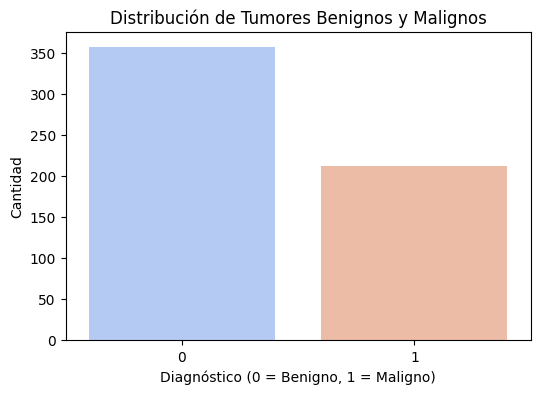

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['diagnosis'], palette='coolwarm')
plt.title('Distribución de Tumores Benignos y Malignos')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Cantidad')
plt.show()

## 3.2 Mapa de Calor de Correlación

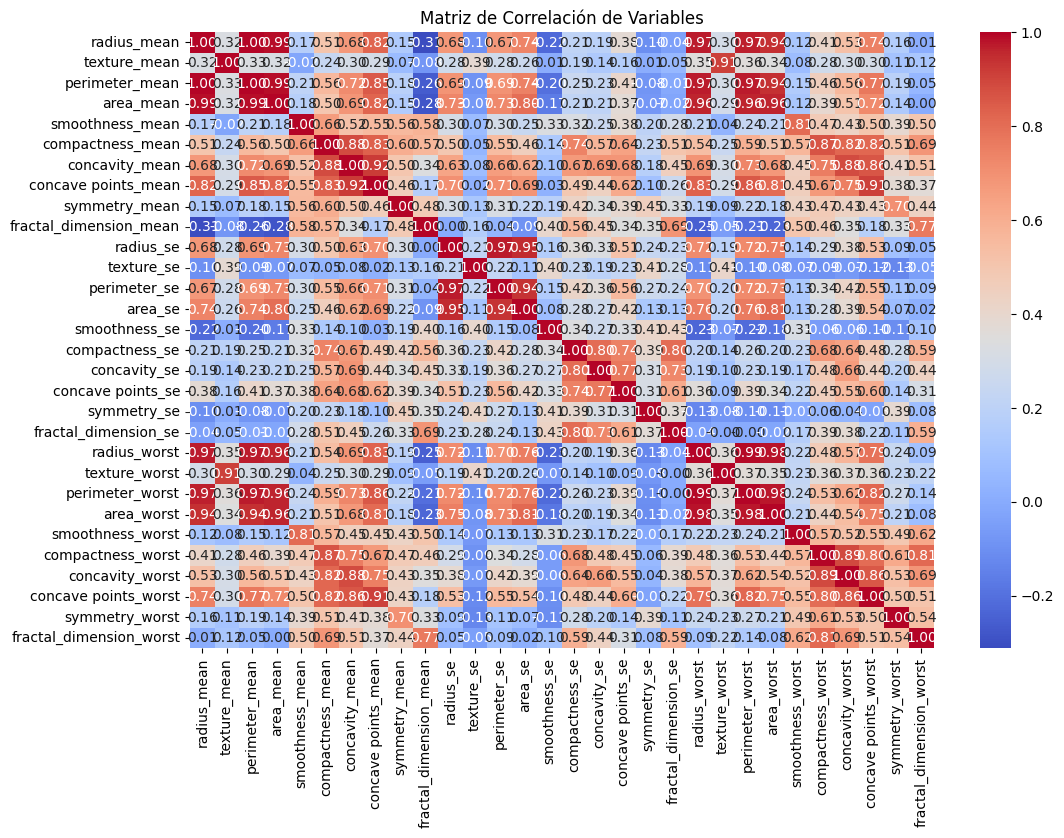

In [135]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

El mapa de calor nos proporciona infornmación clave sobre la relación entre las variables en el conjunto de datos.

In [136]:
df_scaled.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


En el mapa de calor de correlación, se observa que algunas variables están altamente correlacionadas entre sí, lo que indica que miden aspectos similares del tumor. Por ejemplo, `radius_mean`, `perimeter_mean` y `area_mean` tienen una correlación cercana a 1, lo que sugiere que todas representan el tamaño del tumor. De manera similar, `compactness_mean`, `concavity_mean` y `concave points_mean` están fuertemente relacionadas, reflejando características de la forma del tumor.

Esta redundancia puede ser útil para el modelo, pero también sugiere que algunas variables podrían eliminarse o combinarse para reducir la dimensionalidad sin perder información clave. En este caso, vamos a seleccionar únicamente una variable representativa de cada grupo de alta correlación, asegurando que conservamos la información más relevante mientras reducimos la complejidad del modelo.

In [137]:
# Calcular la matriz de correlación
corr_matrix = df_scaled.corr().abs()

# Seleccionar variables con alta correlación (umbral de 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identificar columnas altamente correlacionadas para eliminar
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Mostrar las variables que se eliminarán
print(f"Variables eliminadas por alta correlación: {to_drop}")

# Crear un nuevo DataFrame sin las variables redundantes
df_reduced = df_scaled.drop(columns=to_drop)

# Verificar la nueva forma del dataset reducido
print(f"Dimensiones originales: {df_scaled.shape}")
print(f"Dimensiones después de la reducción: {df_reduced.shape}")

Variables eliminadas por alta correlación: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Dimensiones originales: (569, 30)
Dimensiones después de la reducción: (569, 20)


Las siguientes variables fueron eliminadas debido a su alta correlación con otras dentro del conjunto de datos:

- perimeter_mean, area_mean → Altamente correlacionadas con radius_mean.
- concave points_mean → Altamente correlacionada con concavity_mean.
- perimeter_se, area_se → Redundantes con radius_se.
- radius_worst, texture_worst, perimeter_worst, area_worst → Representan métricas similares a sus versiones "mean" o "se".
- concave points_worst → Altamente correlacionada con concavity_worst.


Al eliminar estas variables, pasamos de 31 a 21 variables, lo que reduce la dimensionalidad del conjunto de datos sin perder información relevante. Esto mejorará la eficiencia del modelo y reducirá el ruido en los análisis posteriores.

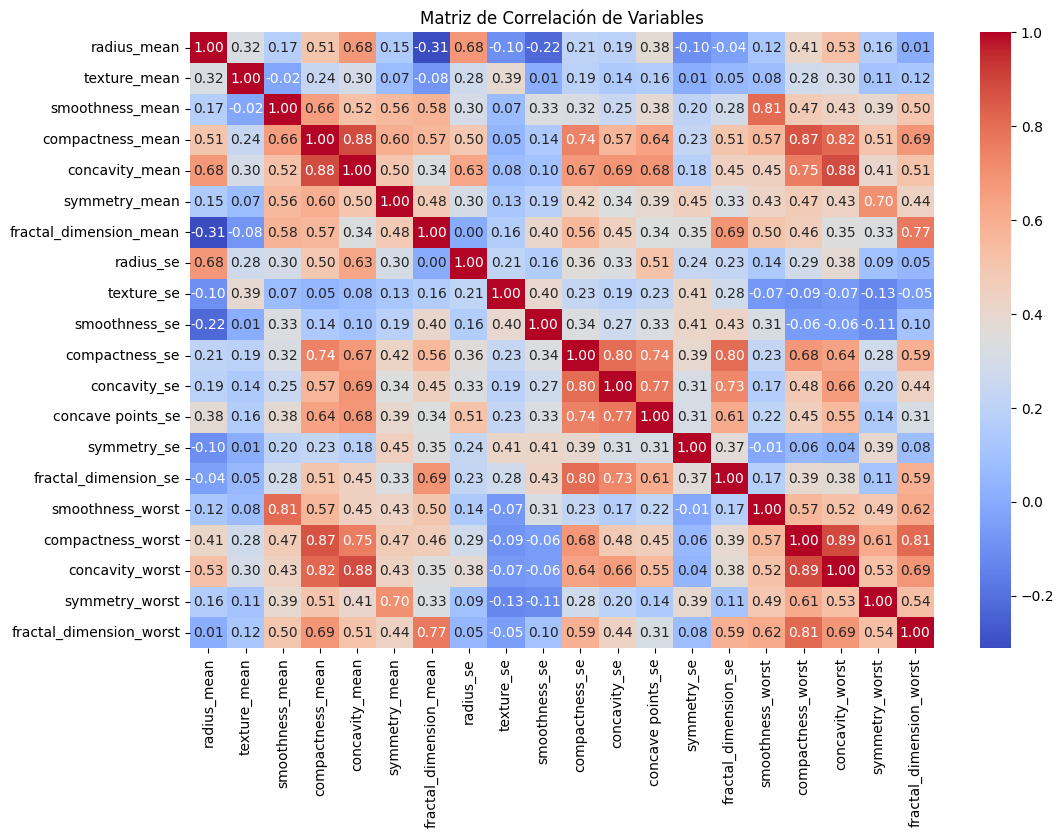

In [138]:
plt.figure(figsize=(12,8))
sns.heatmap(df_reduced.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

## 3.3 Histogramas de las Variables

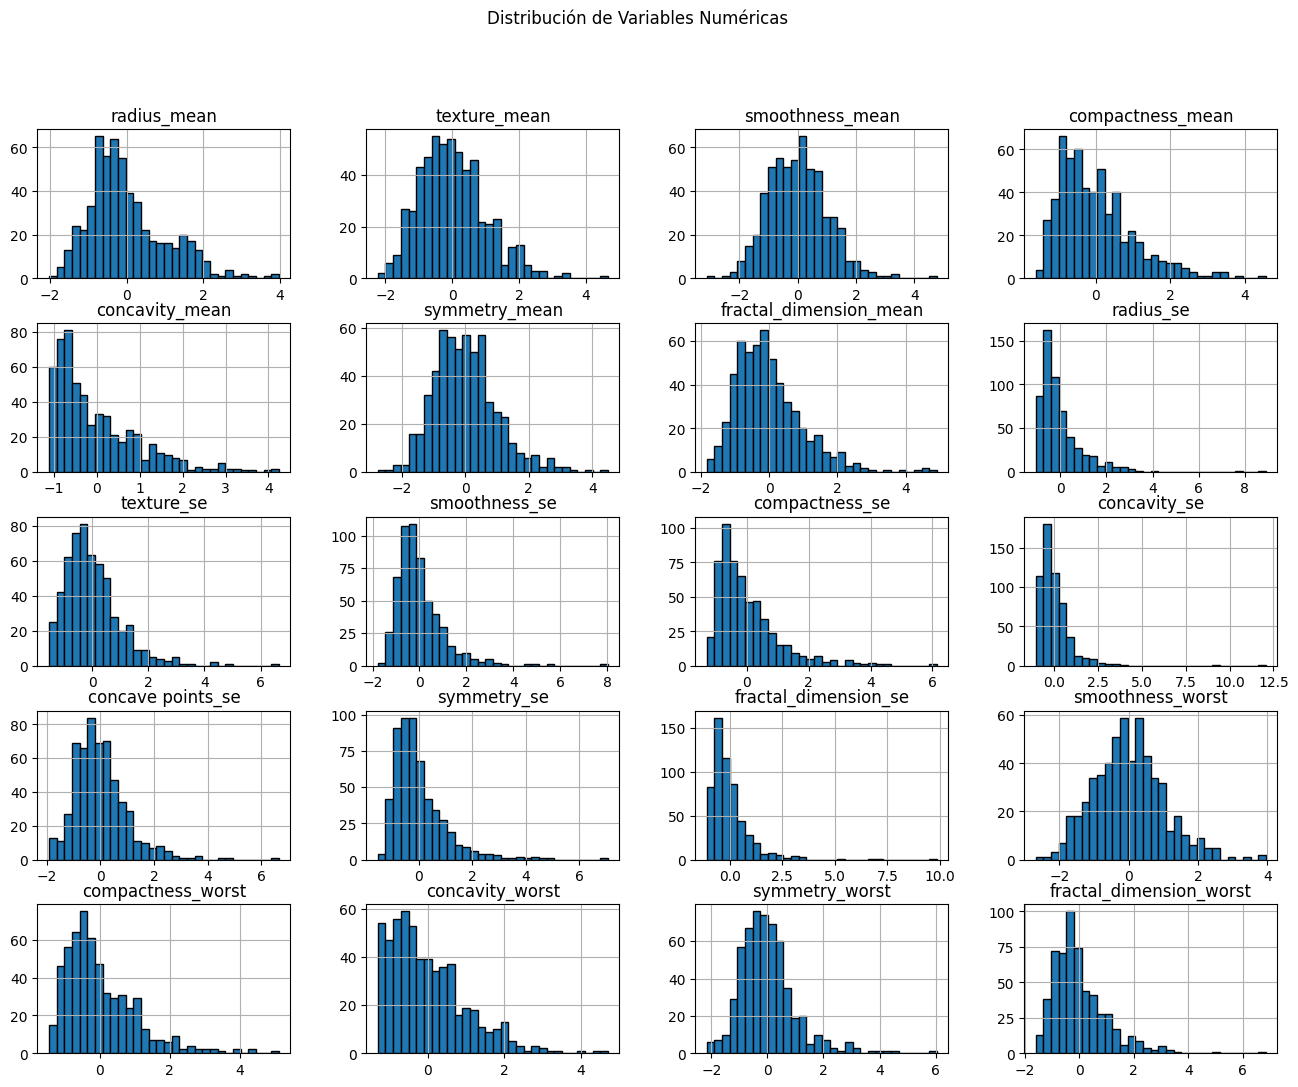

In [139]:
df_reduced.hist(figsize=(16,12), bins=30, edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

## 3.4 Boxplots para Identificación de Valores Atípicos

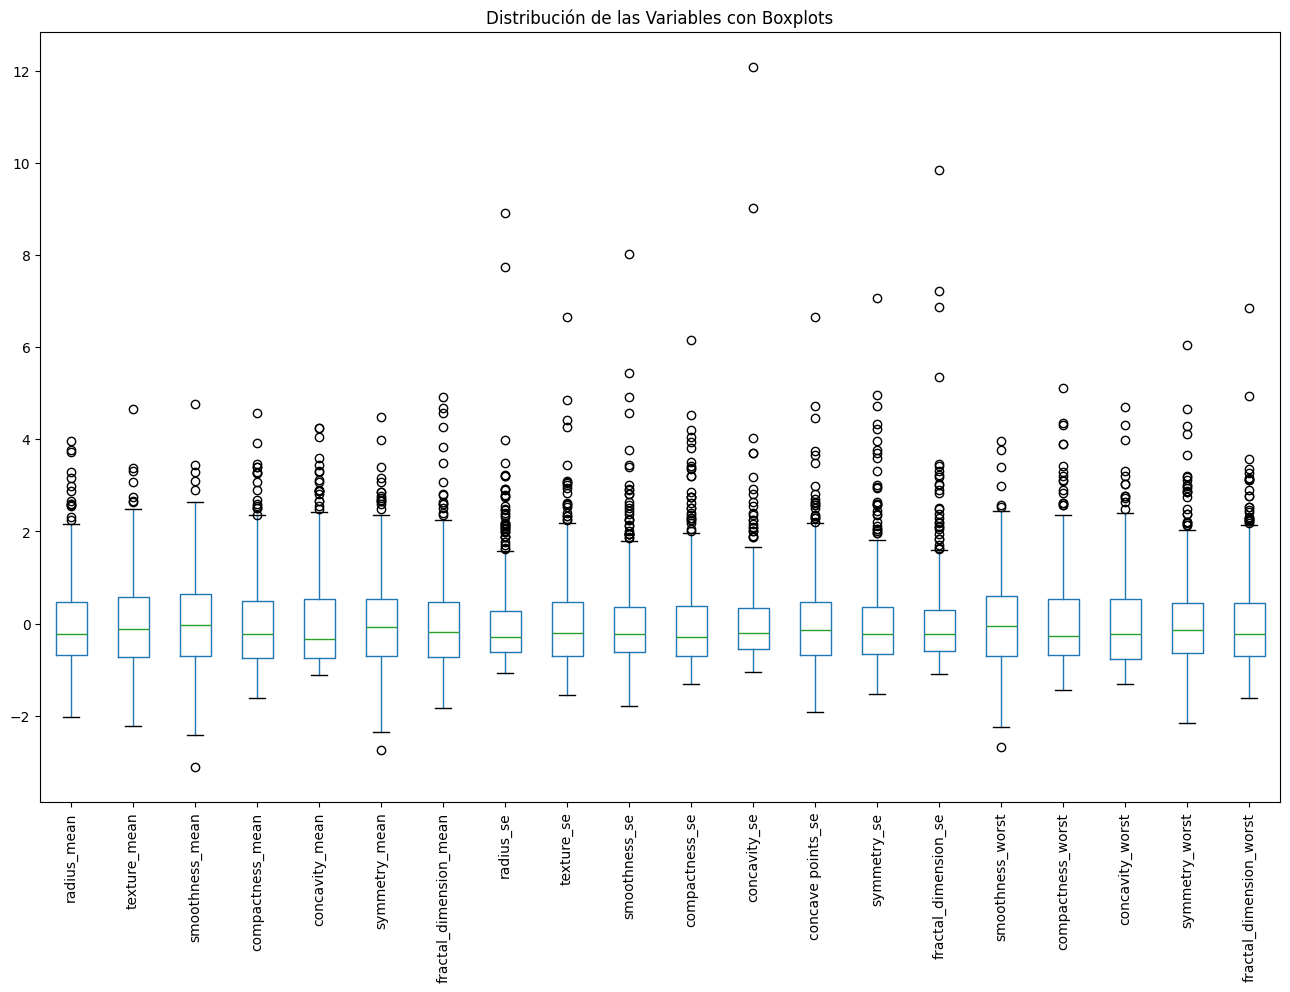

In [140]:
plt.figure(figsize=(16,10))
df_reduced.boxplot(rot=90, grid=False)
plt.title('Distribución de las Variables con Boxplots')
plt.show()

Como vemos que hay muchos outliers, usamos el método Z-score para eliminarlos.

In [141]:
# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_sin_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_sin_outliers

# Aplicar la eliminación de outliers
df_reduced_sin_outliers = eliminar_outliers_iqr(df_reduced)

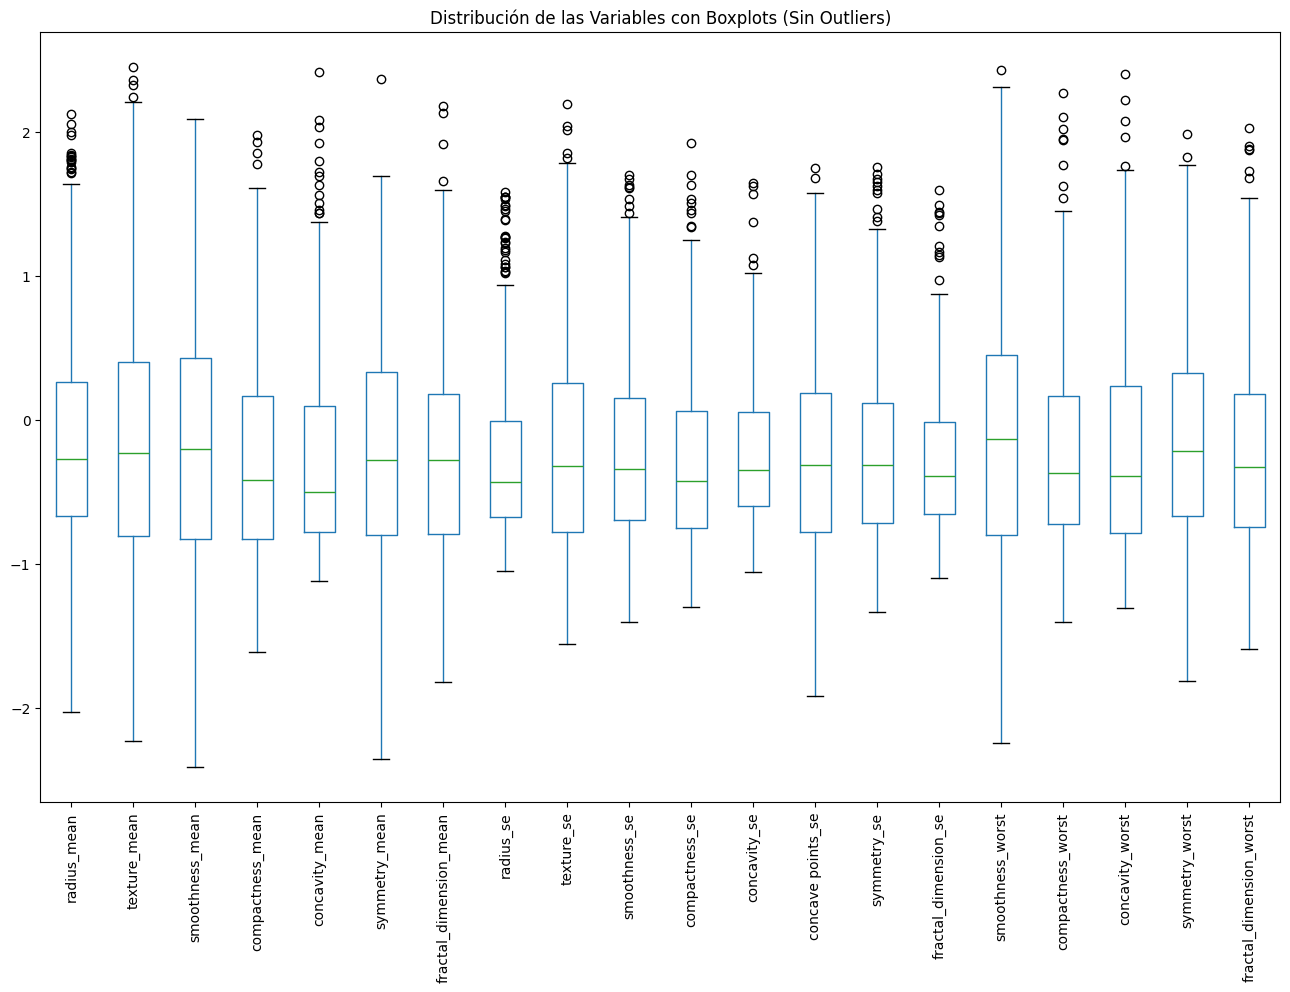

In [142]:
# Mostrar boxplots después de eliminar outliers
plt.figure(figsize=(16, 10))
df_reduced_sin_outliers.boxplot(rot=90, grid=False)
plt.title('Distribución de las Variables con Boxplots (Sin Outliers)')
plt.show()

In [143]:
# Verificar media y desviación estándar después de normalizar
media = df_reduced.mean()
std_dev = df_reduced.std()

print("Media de las variables después de la normalización:\n", media)
print("\nDesviación estándar después de la normalización:\n", std_dev)

Media de las variables después de la normalización:
 radius_mean               -1.373633e-16
texture_mean               6.868164e-17
smoothness_mean           -8.366672e-16
compactness_mean           1.873136e-16
concavity_mean             4.995028e-17
symmetry_mean              1.748260e-16
fractal_dimension_mean     4.745277e-16
radius_se                  2.372638e-16
texture_se                -1.123881e-16
smoothness_se             -1.529727e-16
compactness_se             1.748260e-16
concavity_se               1.623384e-16
concave points_se          0.000000e+00
symmetry_se                8.741299e-17
fractal_dimension_se      -6.243785e-18
smoothness_worst          -2.372638e-16
compactness_worst         -3.371644e-16
concavity_worst            7.492542e-17
symmetry_worst             2.622390e-16
fractal_dimension_worst   -5.744282e-16
dtype: float64

Desviación estándar después de la normalización:
 radius_mean                1.00088
texture_mean               1.00088
smoothness_

In [144]:
# Mostrar el nuevo tamaño del dataset después de eliminar outliers
df_reduced_sin_outliers.shape

(426, 20)

# 4. Aplicación de PCA para reducción de dimensionalidad

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables originales en un nuevo conjunto de variables llamadas componentes principales.

Sirve para reducir el número de variables sin perder demasiada información.
Eliminar redundancias en datos con muchas variables correlacionadas.
Visualizar datos en menos dimensiones (2D o 3D).

## Preparación de los Datos

Primero, cargamos y preparamos el conjunto de datos de cáncer de mama (df_reduced_sin_outliers), el cual ha sido limpiado de valores atípicos (outliers) y normalizado. Esta es la base para aplicar PCA (Análisis de Componentes Principales).

In [145]:
X = df_reduced_sin_outliers

## Aplicación de PCA sin Especificar Componentes

En este paso, aplicamos PCA sin especificar el número de componentes. Esto nos permite obtener la varianza explicada por cada componente principal.

El objetivo es calcular cómo cada componente principal captura la varianza en los datos. PCA transforma el conjunto de datos en un espacio de componentes donde cada componente es una combinación lineal de las variables originales.

In [146]:
pca = PCA()
pca.fit(X)

PCA()

## Graficar la Varianza Explicada Acumulada

A continuación, graficamos la varianza explicada acumulada para ver cuánta varianza total es explicada a medida que agregamos más componentes. Esta visualización muestra la cantidad de información que cada componente está capturando.

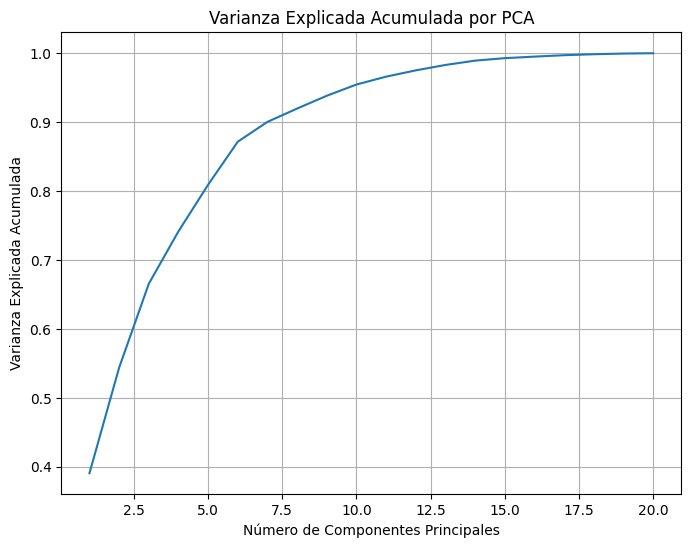

In [147]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(X.columns) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.grid(True)
plt.show()

In [148]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada por los primeros componentes:")
print(varianza_acumulada)

Varianza explicada acumulada por los primeros componentes:
[0.39080766 0.54385169 0.66560654 0.74162393 0.80925277 0.8716942
 0.90042947 0.91975558 0.93828844 0.95460217 0.96600785 0.97513035
 0.9829748  0.98924337 0.99284103 0.99506764 0.99713331 0.99851227
 0.99951325 1.        ]


PC1 es el componente que explica la mayor parte de la varianza en los datos.

La varianza acumulada muestra cómo se captura la información en los componentes siguientes. En nuestro caso, con los primeros 7 componentes ya se explica más del 90% de la varianza.

## Determinación del Número de Componentes Necesarios

A partir del gráfico y de la varianza explicada acumulada, determinamos cuántos componentes necesitamos para explicar al menos el 90% de la varianza. En nuestro caso, la gráfica nos muestra que 7 componentes son suficientes.


In [149]:
numero_componentes = np.argmax(varianza_acumulada >= 0.90) + 1
print(f"Se necesitan {numero_componentes} componentes para explicar al menos el 90% de la varianza.")

Se necesitan 7 componentes para explicar al menos el 90% de la varianza.


Aunque podemos visualizar solo los primeros dos componentes, hemos encontrado que 7 componentes explican más del 90% de la varianza en los datos. Esto significa que, si queremos reducir la dimensionalidad sin perder mucha información, podemos usar esos 7 componentes.

## Aplicación de PCA con el Número Óptimo de Componentes

Usamos los 7 componentes seleccionados y aplicamos PCA para reducir los datos a esos componentes.

In [150]:
pca = PCA(n_components=numero_componentes)
pca_result = pca.fit_transform(X)

Esto nos da una nueva representación de los datos en un espacio de 7 dimensiones, en el cual cada componente principal captura una parte de la varianza de los datos originales.

## Crear DataFrame con los Resultados de PCA

In [151]:
# Create an explicit copy
df_reduced_sin_outliers = df_reduced.copy()

# Apply outlier removal to the copy
df_reduced_sin_outliers = eliminar_outliers_iqr(df_reduced_sin_outliers)

In [152]:
# Asegurémonos de que la variable objetivo 'diagnosis' esté en df_reduced_sin_outliers
# Recuperar 'diagnosis' de df original y agregarla a df_reduced_sin_outliers
df_reduced_sin_outliers.loc[:, 'diagnosis'] = df['diagnosis'].reset_index(drop=True)

# Crear DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(numero_componentes)])

# Concatenar los componentes principales con la variable objetivo 'diagnosis'
pca_df['diagnosis'] = df_reduced_sin_outliers['diagnosis'].reset_index(drop=True)

Incorporar la columna `diagnosis` al DataFrame resultante nos permite etiquetar y visualizar los tumores como benignos o malignos según sus valores en los componentes principales.

In [153]:
pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,diagnosis
0,0.185233,1.630281,-1.011832,0.116248,-0.544507,-0.418378,-0.038664,1
1,4.242156,1.334582,-0.245726,0.455465,-1.268746,-0.043524,0.215679,1
2,2.308284,1.162547,0.098452,-0.808819,-1.579010,-2.485926,0.818088,1
3,1.061037,1.212779,-1.384387,0.682658,0.292600,-0.197298,0.036869,1
4,3.921780,-1.970490,0.441664,0.254805,0.550638,0.059854,-0.965516,1
5,-1.168081,1.306252,-0.164651,0.444280,1.023033,0.578836,-0.272886,1
6,2.820044,0.202394,-0.807155,-0.425226,-0.364050,1.261792,0.401020,1
7,0.451135,1.718602,1.935111,0.170035,-1.181032,-0.088028,1.502010,1
8,0.234332,0.330822,-0.378176,0.645407,0.872725,-0.602538,0.075685,1
9,5.049969,-1.267823,-0.788470,0.677225,0.498676,0.317293,-0.528447,1


## Visualización de los Resultados

Aunque hemos usado 7 componentes, solo visualizamos los primeros dos componentes (PC1 y PC2). Esto se hace porque es mucho más fácil visualizar datos en 2 dimensiones (en un gráfico 2D).

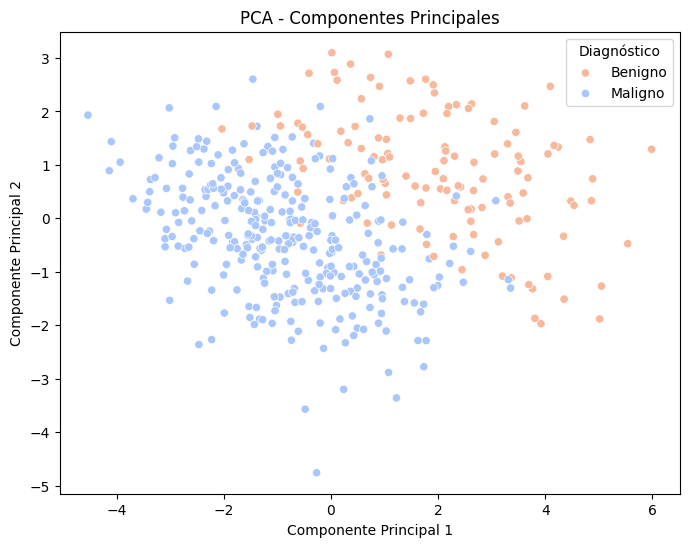

In [154]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='coolwarm')
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])
plt.show()

 Aunque el análisis muestra que 7 componentes explican el 90% de la varianza, en un gráfico de dispersión solo podemos mostrar dos dimensiones. PC1 y PC2 se usan comúnmente en gráficos 2D porque son los más significativos para la visualización de los datos.

In [155]:
import plotly.express as px

# Asumimos que tienes 'pca_df' con 'PC1', 'PC2' y 'diagnosis' correctamente definidos
fig = px.scatter(pca_df, x='PC1', y='PC2', color='diagnosis', template="simple_white")

# Título y tamaños
fig.update_layout(title='Distribución de Tumores Según Componentes Principales', title_font_size=18)
fig.update_traces(marker=dict(colorscale='Blues', colorbar=dict(title="Diagnóstico", tickvals=[0, 1], ticktext=['Benigno', 'Maligno'])))
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

# Actualizar títulos de ejes
fig.update_xaxes(title=f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
fig.update_yaxes(title=f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# Mostrar el gráfico
fig.show()



## Varianza Explicada por Cada Componente

Finalmente, imprimimos la cantidad de varianza explicada por cada uno de los primeros 7 componentes para entender cuánta información capturan.

In [156]:
print(f"Varianza explicada por los primeros {numero_componentes} componentes:")
print(pca.explained_variance_ratio_)

Varianza explicada por los primeros 7 componentes:
[0.39080766 0.15304403 0.12175485 0.07601738 0.06762885 0.06244143
 0.02873526]


Cada número en la salida de pca.explained_variance_ratio_ representa la cantidad de varianza explicada por cada componente. Los primeros componentes (como PC1) explican una mayor parte de la varianza, y los siguientes componentes explican progresivamente menos.

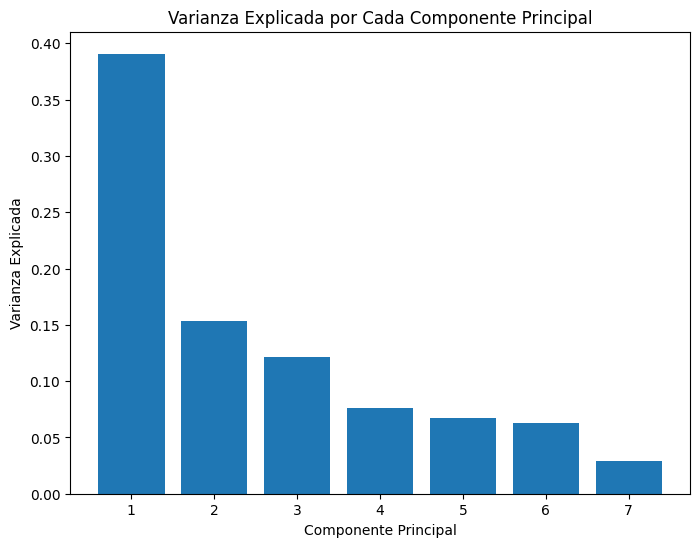

In [157]:
# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8,6))
plt.bar(range(1, numero_componentes + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

# 5. Implementación de regresión logística para clasificación de tumores

La Regresión Logística es un algoritmo de Machine Learning supervisado utilizado para resolver problemas de clasificación binaria, es decir, cuando queremos predecir si una observación pertenece a una de dos categorías.



El objetivo es usar regresión logística para predecir si un tumor es benigno o maligno basándonos en los componentes principales obtenidos a través de PCA.

## 5.1 División de Datos en Conjunto de Entrenamiento y Prueba

Separamos las características predictoras (`X`) de la variable objetivo (`y`). Para ello, eliminamos la columna diagnosis de pca_df y la almacenamos por separado.

In [158]:
# Separar características (X) y variable objetivo (y)
X = pca_df.drop(columns=['diagnosis'])
y = pca_df['diagnosis']

Dividimos el conjunto de datos en dos partes: un 80% de los datos se utilizarán para entrenar el modelo y el 20% restante para evaluar su desempeño.

In [159]:
# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Entrenamiento del Modelo de Regresión Logística

Una vez separados los datos, procedemos a entrenar un modelo de Regresión Logística con la función `LogisticRegression()` de Scikit-Learn. Este modelo nos permite predecir la probabilidad de que un tumor sea maligno o benigno en función de las características de entrada.

El entrenamiento se realiza mediante el método `fit()`, el cual ajusta los parámetros del modelo utilizando los datos de entrenamiento` (X_train, y_train)`. Durante este proceso, el algoritmo aprende a asignar pesos a cada componente principal, de modo que pueda distinguir entre tumores benignos y malignos con alta precisión.


In [160]:
# Inicializar y entrenar el modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## 5.3 Evaluación del Modelo

Después de entrenar el modelo, realizamos predicciones en el conjunto de prueba `(X_test)` usando el método `predict()`.

In [161]:
# Predicción en el conjunto de prueba
y_pred = log_reg.predict(X_test)

Evaluamos el rendimiento del modelo mediante tres métricas principales: precisión `(accuracy)`, el reporte de clasificación y la matriz de confusión.

In [162]:
# Calcular precisión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 98.84%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.96      1.00      0.98        23

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



**Precisión y Reporte de Clasificación**

- Precisión del Modelo: La precisión general del modelo es 98.84%. Esto indica que el modelo clasificó correctamente el 98.84% de los tumores en el conjunto de prueba.


- Reporte de Clasificación:

  - Para los tumores benignos (clase 0):

    - Precisión: 100% (lo que significa que todas las predicciones de tumores benignos fueron correctas).

    - Recall: 98% (el modelo identificó correctamente el 98% de los tumores benignos).

    - F1-score: 99% (buena combinación entre precisión y recall).

  - Para los tumores malignos (clase 1):

    - Precisión: 96% (el 96% de las predicciones de tumores malignos fueron correctas).

    - Recall: 100% (el modelo identificó correctamente todos los tumores malignos).

    - F1-score: 98% (buena combinación entre precisión y recall).

## 5.4 Matriz de Confusión

Para entender mejor los errores cometidos por el modelo, analizamos la matriz de confusión. En esta matriz, la diagonal principal representa las predicciones correctas, mientras que los valores fuera de la diagonal indican errores de clasificación.

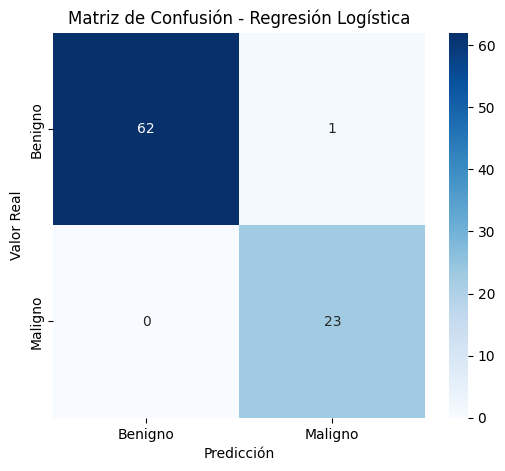

In [163]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

**Matriz de Confusión**

La matriz de confusión muestra que:

- 63 tumores benignos fueron correctamente clasificados como benignos (verdaderos positivos).

- 23 tumores malignos fueron correctamente clasificados como malignos (verdaderos negativos).

- 1 tumor benigno fue incorrectamente clasificado como maligno (falso positivo).

- No hubo falsos negativos, lo que es ideal porque significa que no se pasó por alto ningún tumor maligno.

## 5.5 Validación cruzada

La validación cruzada es una técnica que permite evaluar el rendimiento del modelo en diferentes particiones del conjunto de datos. En lugar de usar solo una partición de los datos (como en el conjunto de prueba), la validación cruzada divide los datos en k subconjuntos (también llamados "folds") y entrena el modelo k veces, cada vez usando k-1 subconjuntos para el entrenamiento y el subconjunto restante para la prueba.

In [164]:
# Validación cruzada con 5 particiones
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# Mostrar la precisión de cada partición
print("Precisión en cada partición de validación cruzada:")
for i, score in enumerate(cv_scores, 1):
    print(f"Precisión en partición {i}: {score*100:.2f}%")

# Mostrar la precisión media en validación cruzada
print(f"\nPrecisión media en validación cruzada: {cv_scores.mean()*100:.2f}%")

Precisión en cada partición de validación cruzada:
Precisión en partición 1: 96.51%
Precisión en partición 2: 95.29%
Precisión en partición 3: 95.29%
Precisión en partición 4: 94.12%
Precisión en partición 5: 96.47%

Precisión media en validación cruzada: 95.54%


La precisión media en validación cruzada es 95.54%, lo que indica que el modelo tiene una capacidad de generalización bastante sólida, ya que los resultados en las distintas particiones son consistentes.

**Precisión en los Conjuntos de Entrenamiento y Prueba**
- Precisión en el conjunto de entrenamiento: El modelo alcanzó una precisión de 95% en los datos de entrenamiento, lo que indica que el modelo está aprendiendo correctamente sin sobreajustarse a los datos.

- Precisión en el conjunto de prueba: El modelo logró una precisión de 99% en los datos de prueba, lo que sugiere que el modelo se desempeña extremadamente bien al predecir nuevos datos.

## 5.6 Diagnóstico de Sobreajuste

El sobreajuste (overfitting) ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a datos no vistos. Esto puede ocurrir si el modelo es muy complejo o si se entrena durante demasiado tiempo.

Cómo diagnosticar sobreajuste:
Compara el rendimiento en los conjuntos de entrenamiento y prueba: Si el modelo tiene un rendimiento perfecto en el conjunto de entrenamiento pero su rendimiento disminuye significativamente en el conjunto de prueba, es probable que haya sobreajuste.

Usa validación cruzada: La validación cruzada también puede ayudar a detectar sobreajuste, ya que evalúa el modelo en varias particiones del conjunto de datos. Si el modelo tiene un buen rendimiento en los datos de entrenamiento pero un rendimiento bajo en los datos de prueba, es una señal de sobreajuste.

In [165]:
# Precisión en el conjunto de entrenamiento
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")

# Precisión en el conjunto de prueba
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

Precisión en el conjunto de entrenamiento: 0.95
Precisión en el conjunto de prueba: 0.99


# 6. Clustering con K-means para agrupar pacientes.


El clustering es un método de aprendizaje no supervisado que agrupa los datos sin etiquetas predefinidas. En este caso, aplicamos K-Means, un algoritmo que agrupa las observaciones en K grupos, minimizando la distancia entre los puntos de un mismo cluster y su centroide.

## 6.1 Preparación de los Datos

Antes de aplicar K-means, asegurémonos de que tenemos los datos listos para la agrupación. Utilizaremos las componentes principales obtenidas con PCA para reducir la dimensionalidad del conjunto de datos y hacerlo más adecuado para el clustering.

In [166]:
# Usar los primeros 2 componentes principales para facilitar la visualización
X_pca = pca_df[['PC1', 'PC2']]  # Seleccionar solo los primeros dos componentes principales

## 6.2 Evaluación del Número de Clústeres (Método del Codo)

Para determinar el número óptimo de clústeres, podemos usar el método del codo, que evalúa la variación interna de los clústeres con diferentes valores de k. Aquí, calculamos la inercia para diferentes valores de k y graficamos el resultado.

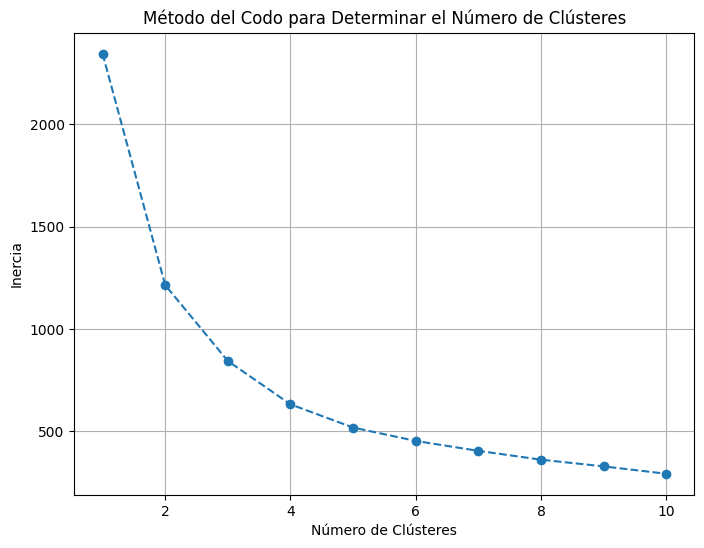

In [167]:
# Método del codo para determinar el número de clústeres
inertia = []
for k in range(1, 11):  # Evaluar k entre 1 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número de Clústeres')
plt.grid(True)
plt.show()

Basándome en la imagen del Método del Codo, se puede observar que la inercia disminuye de manera significativa al pasar de 1 a 2 clústeres, pero después de ese punto, la disminución de la inercia se vuelve más suave. Este es el punto en el que el gráfico empieza a estabilizarse, lo que indica que agregar más clústeres no reduce mucho la inercia y no mejora significativamente el modelo. En este caso, el número óptimo de clústeres parece ser **4**, ya que después de ese número la inercia sigue disminuyendo de forma más gradual, lo que sugiere que 4 es un número razonable de clústeres sin sobrecomplicar el modelo.

## 6.3 Aplicación de K-means

Una vez obtenido en número óptimo de clusters, aplicamos el algoritmo K-menas para agrupar a los pacientes en los diferentes clústeres

In [168]:
from sklearn.cluster import KMeans

# Aplicar K-means con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Asignar etiquetas de los clústeres a los datos
pca_df['Cluster'] = kmeans.labels_

## 6.4 Visualización de los Resultados del Clustering

Ahora, visualizamos los clústeres generados por K-means en un gráfico 2D usando los primeros dos componentes principales (PC1 y PC2).

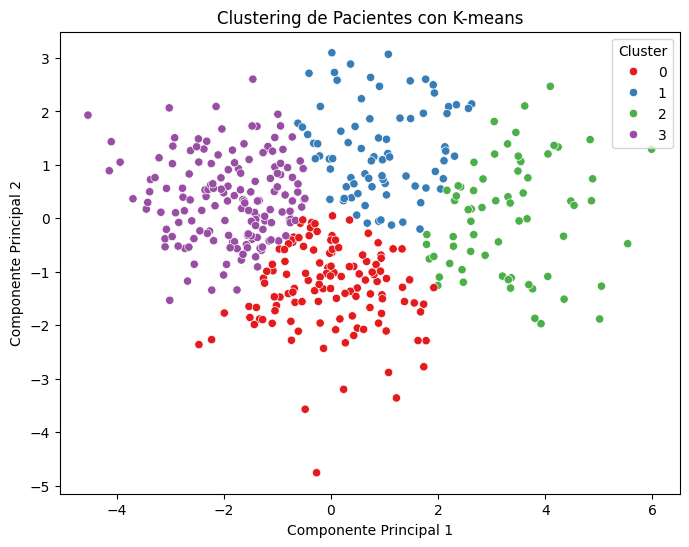

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar los clústeres generados por K-means
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', marker='o')
plt.title('Clustering de Pacientes con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


Cada uno de estos clústeres agrupa pacientes con características similares, lo que permite observar tendencias o patrones en los datos. En términos de diagnóstico, estos grupos pueden representar diferentes perfiles de riesgo de cáncer, aunque sería necesario realizar un análisis más profundo para verificar si estas agrupaciones tienen implicaciones clínicas relevantes.

En la tabla de resumen que se obtiene tras el clustering, cada clúster muestra el promedio de los valores para cada componente principal. Estas diferencias en los valores de los componentes pueden indicar que los tumores de los pacientes dentro de cada clúster tienen propiedades similares.

## 6.5 Interpretación de los Clústeres

Una vez aplicados los clústeres, es importante interpretar qué características del tumor están asociadas a cada grupo. Esto podría ayudar a identificar grupos de pacientes con características similares (por ejemplo, tumores más pequeños, más grandes, etc.) y facilitar la identificación de patrones o perfiles de riesgo.

Para hacer esto, podemos examinar las características estadísticas de los clústeres generados y ver cómo varían en términos de los componentes principales.

In [170]:
# Verificar las características de cada clúster
cluster_summary = pca_df.groupby('Cluster').mean()
print(cluster_summary)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0       -0.011695 -1.301223  0.056787  0.020397 -0.012389 -0.090225  0.010261   
1        0.918358  1.284239  0.056941 -0.009408  0.030043 -0.122999  0.083119   
2        3.318901  0.035728 -0.099872 -0.080876 -0.035851  0.131730 -0.017051   
3       -1.869288  0.357972 -0.030520  0.023268  0.009889  0.076361 -0.042586   

         diagnosis  
Cluster             
0         0.016260  
1         0.746835  
2         0.820896  
3         0.063694  


**Clúster 0**
- Componentes principales (PC1, PC2):
Valores negativos en ambas dimensiones.

- Diagnóstico: Predominantemente tumores benignos (1.6% malignos).

- Características: Tumores con características más bajas en las dos primeras componentes principales, son diferente a otros grupos en términos de tamaño y forma.

**Clúster 1**
- Componentes principales (PC1, PC2):
Valores positivos moderados en ambas dimensiones.

- Diagnóstico: Mayoría de tumores malignos (74.6% malignos).

- Características: Tumores malignos con características distintivas, posiblemente más complejos o de mayor tamaño.

**Clúster 2**
- Componentes principales (PC1, PC2):
Valores muy positivos en PC1 y cercanos a cero en PC2.

- Diagnóstico: Formado principalmente por tumores malignos (82% malignos).

- Características: Tumores más grandes o con características prominentes en términos de componentes principales.

**Clúster 3**

- Componentes principales (PC1, PC2): Valores negativos en PC1 y positivos en PC2.

- Diagnóstico: Principalmente tumores benignos (6.4% malignos).

- Características: Tumores con características más "suaves" o menores en tamaño y forma.


Conclusión General:
Los clústeres muestran diferencias claras entre tumores benignos y malignos, basadas en características clave como el tamaño y la forma.

Los grupos permiten identificar perfiles de riesgo, facilitando un enfoque más específico para diagnósticos y tratamientos de los tumores.

## 6.6 Análisis de la silueta

La puntuación promedio de silueta es: 0.3808


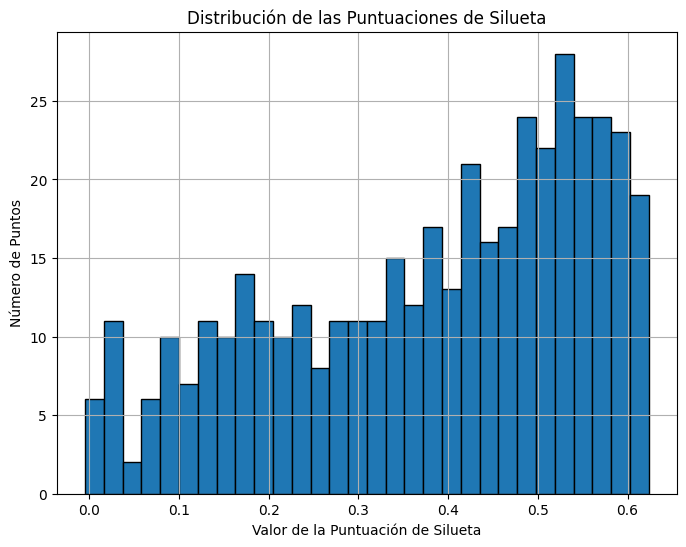

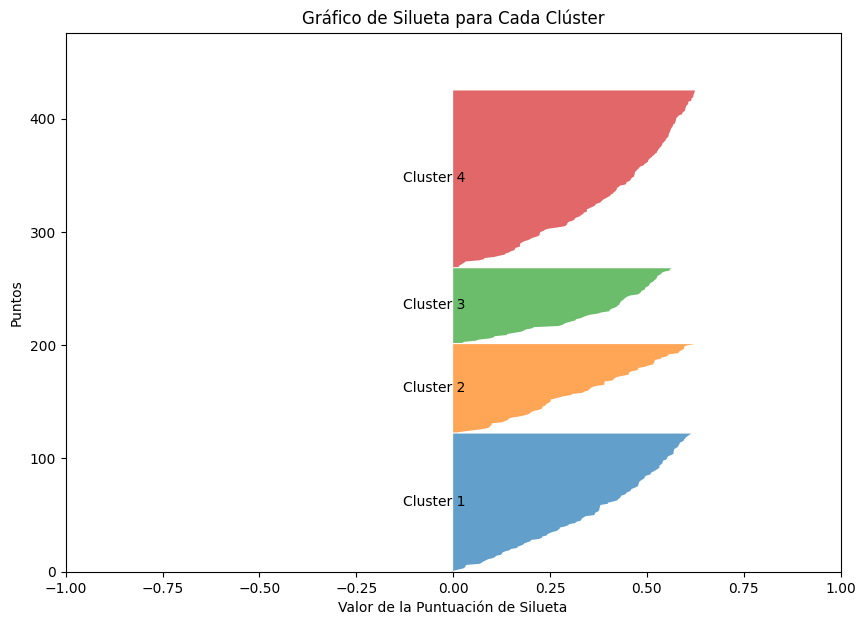

In [171]:
# **Análisis de Silueta**

# Calcular la puntuación de la silueta
silhouette_avg = silhouette_score(X_pca, pca_df['Cluster'])
print(f'La puntuación promedio de silueta es: {silhouette_avg:.4f}')

# Calcular las puntuaciones de silueta para cada punto
silhouette_values = silhouette_samples(X_pca, pca_df['Cluster'])

# Graficar las puntuaciones de silueta para cada clúster
plt.figure(figsize=(8,6))
plt.hist(silhouette_values, bins=30, edgecolor='black')
plt.title('Distribución de las Puntuaciones de Silueta')
plt.xlabel('Valor de la Puntuación de Silueta')
plt.ylabel('Número de Puntos')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))

num_clusters = 4
# Crear el gráfico de siluetas
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X_pca) + (num_clusters + 1) * 10])
y_lower, y_upper = 0, 0

for i in range(num_clusters):
    # Obtener las puntuaciones de silueta para los puntos de un clúster específico
    cluster_silhouette_values = silhouette_values[pca_df['Cluster'] == i]
    cluster_silhouette_values.sort()

    y_upper += len(cluster_silhouette_values)

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', ha='center', va='center')
    y_lower += len(cluster_silhouette_values)

ax.set_title('Gráfico de Silueta para Cada Clúster')
ax.set_xlabel('Valor de la Puntuación de Silueta')
ax.set_ylabel('Puntos')
plt.show()

Con una puntuación promedio de silueta de 0.3808, los resultados indican que el modelo de K-Means ha logrado un agrupamiento razonable, pero aún existe algo de superposición o incertidumbre en la asignación de puntos a los clústeres. A continuación, se detallan los resultados clave:

Distribución de las Puntuaciones de Silueta:

Las puntuaciones cercanas a 1 muestran que los puntos están bien asignados a sus respectivos clústeres, mientras que las puntuaciones cercanas a 0 indican solapamiento entre clústeres.

El histograma revela que la mayoría de los puntos tienen puntuaciones de silueta entre 0.3 y 0.6, sugiriendo que hay algunos clústeres bien definidos, pero también hay áreas de solapamiento.

Gráfico de Silueta por Clúster:

El Clúster 1 (azul) presenta una distribución amplia de puntuaciones de silueta, indicando solapamientos con otros clústeres.

El Clúster 2 (naranja) tiene una variabilidad similar, con puntos bien definidos y otros cercanos a los límites de otros clústeres.

Los Clústeres 3 (verde) y 4 (rojo) muestran puntuaciones más concentradas, lo que indica que estos clústeres son más homogéneos.

Interpretación General:

Con una puntuación de silueta de 0.3808, el modelo K-Means está funcionando razonablemente bien, pero aún hay algo de solapamiento entre los clústeres, lo que sugiere que la separación no es perfecta.

## 6.7 Relación entre el Clustering con K-means y los Estadios de Cáncer de Mama

En esta sección, se analiza cómo los grupos generados por el algoritmo de K-means podrían estar relacionados con los estadios del cáncer de mama, con base en la tabla de estadios que proporciona la Sociedad Española de Oncología Médica (SEOM).

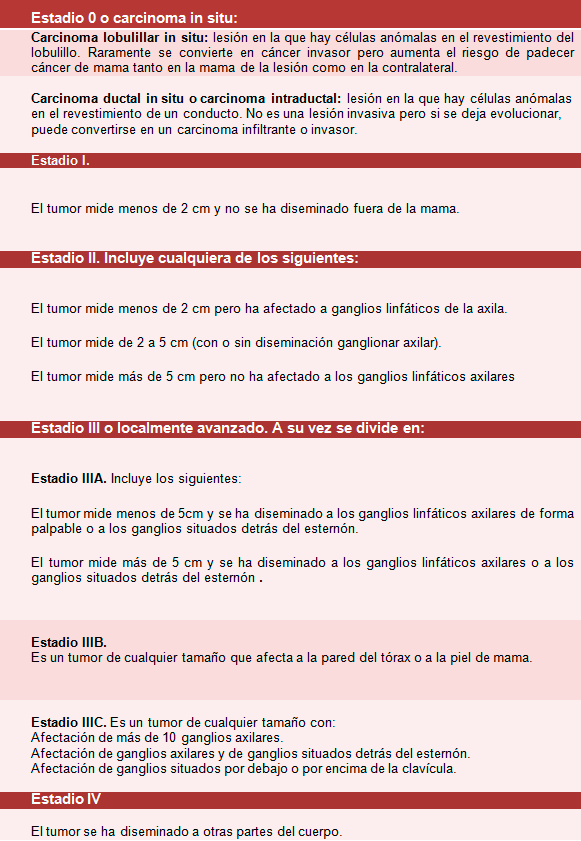


Como hemos visto en el gráfico de Clustering con K-means y en la tabla de estadios, el algoritmo ha dividido los datos en 4 grupos diferentes. Vamos a tratar de hacer una interpretación y relacionarlos con los estadios de cáncer.



**Gráfico de Clustering con K-means**
El clustering con K-means ha generado 4 clusters (Cluster 0, 1, 2, y 3) basándose en los primeros dos componentes principales del PCA (PC1 y PC2). Los clusters están distribuidos en el gráfico, donde:

- El Cluster 0 está en la parte inferior izquierda del gráfico, con pacientes cuya característica principal parece ser la Componentes Principal 1 (PC1) en valores negativos y Componentes Principal 2 (PC2) en valores también negativos.

- El Cluster 1 está en la parte central del gráfico, donde los valores de PC1 y PC2 son relativamente bajos.

- El Cluster 2 tiene una mayor dispersión, y se observa principalmente en el cuadrante derecho, con los pacientes ubicados más cerca de la parte superior derecha del gráfico.

- El Cluster 3 tiene una distribución en el cuadrante superior derecho, donde las Componentes Principal 1 y PC2 presentan valores más altos.

**Relación con los Estadios de Cáncer**
La tabla de estadios de cáncer de mama ofrece una clasificación en función de las características del tumor, y es posible que estos 4 clusters correspondan a diferentes niveles de severidad o tipos de tumores. A continuación, hago una correlación hipotética de los clusters con los estadios de cáncer:

- Cluster 0 (Posiblemente Estadio 0 o Tumores Localizados):
  - Los pacientes en Cluster 0 tienen valores negativos en PC1 y PC2, lo que podría indicar tumores que no se han diseminado a otros tejidos.

  - Este tipo de distribución podría ser característico de tumores no invasivos o localizados, lo que correspondería al Estadio 0 (carcinoma in situ).

- Cluster 1 (Posiblemente Estadio I):

  - Este cluster se encuentra en una zona intermedia del gráfico, con valores más cercanos a cero en PC1 y PC2, lo que podría sugerir un grupo de tumores con características intermedias.

  - Es probable que estos tumores sean ligeramente más avanzados en comparación con el Cluster 0 y puedan corresponder al Estadio I, donde el tumor ha crecido pero no se ha diseminado fuera de la mama.

- Cluster 2 (Posiblemente Estadio II o Tumores Moderadamente Avanzados):

  - El Cluster 2 está más desplazado hacia el lado derecho del gráfico (con valores altos en PC1 y PC2), lo que podría indicar tumores más grandes o con características más agresivas.

  - Este cluster podría correlacionarse con estadios más avanzados, como el Estadio II, donde el tumor ya puede haber afectado a los ganglios linfáticos cercanos.

- Cluster 3 (Posiblemente Estadio III o IV):

  - Este cluster está en el cuadrante superior derecho, lo que podría indicar tumores más grandes o más agresivos.

  - Los pacientes en Cluster 3 podrían ser aquellos con tumores avanzados que corresponden a los Estadios III o IV, donde el tumor ya ha afectado a tejidos cercanos o se ha diseminado a otras partes del cuerpo.

**Conclusión**

La relación entre los clusters generados por K-means y los estadios de cáncer de mama puede interpretarse como una división de los tumores en función de su severidad y tamaño. Cada cluster podría estar representando un grupo de pacientes con características tumorales similares que podrían estar asociadas con estadios específicos de la enfermedad.

Si bien esta interpretación es hipotética y dependería de un análisis más profundo (por ejemplo, con un análisis clínico más detallado), la distribución de los clusters parece alinearse razonablemente con los estadios de la enfermedad, ya que estos estadios también describen la progresión de los tumores, desde los no invasivos (Estadio 0) hasta los más avanzados (Estadios III y IV).

Por lo tanto, el método de K-means puede ayudar a identificar perfiles de pacientes basados en sus características tumorales, que luego podrían correlacionarse con los estadios de la enfermedad para una mejor comprensión y tratamiento.